# Demo: Beispiel aus Kursbuch

Beispiel aus Kapitel 3.1 aus Buch 'Machine Learning mit Python' von Sebastian Raschka.

Modellierung der Iris-Datensammlung, die bereits in Scikit-Learn verfügbar ist, zum Testen und Experimentieren mit Algorithmen. Zwecks Visualisierung werden wir nur zwei Merkmale der Iris-Datensammlung
verwenden. Der Merkmalsmatrix X weisen wir die Länge und Breite der Blütenblätter der 150
Blumenexemplare zu. Die zugehörigen Klassenbezeichnungen der Blumenarten
werden im Vektor y gespeichert:

In [ ]:
from sklearn import datasets
import numpy as np

## Daten-Preprocessing

Laden der Datenbank und Definition von Netz-input X und und Labels y

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Mit np.unique(y) werden die unterschiedlichen Klassenbezeichnungen/Labels angezeigt, die bereits als Integer formatiert sind: Iris setosa (0), Iris versicolor (1), Iris virginica (2)

Mit der __train_test_split__-Funktion des zu scikit-learn gehörenden __model_selection__-Moduls teilen wir den Datenbestand in 30 Prozent Testdaten (45 Objekte) und 70 Prozent Trainingsdaten (105 Objekte) auf.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Mit der Definition des Random-State lässt sich eine reproduzierbare Aufteilung der Trainings- und Testdaten erzeugen (Pseudo-Zufallsgenerator). 

Und schließlich nutzen wir die integrierte Unterstützung für stratifizierte Zufallsstichproben mit __stratify=y__ zu unserem Vorteil. Daraus resultiert, dass das Verhältnis der Labels (0,1,2) dem Verhältnis der Inputs entspricht.

In [6]:
print('Labels in y:', np.bincount(y))
print('Labels in y_train:', np.bincount(y_train))
print('Labels in y_test:', np.bincount(y_test))

Labels in y: [50 50 50]
Labels in y_train: [35 35 35]
Labels in y_test: [15 15 15]


Standardisierung/Normierung der Feature (Inputs), um eine optimale Leistung zu erzeugen:

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std[:5])
print(X_test_std[:5])

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]]
[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]]


Der Code lädt die __StandardScaler__-Klasse des __preprocesssing__-Moduls und initialisiert ein neues __StandardScaler__-Objekt, das der Variablen sc zugewiesen wird. Mit der fit-Methode schätzt das __StandardScaler__-Objekt den Mittelwert μ und die Standardabweichung σ für jedes Merkmal der Trainingsdaten. Durch den Aufruf der transform-Methode werden die Trainingsdaten unter Verwendung der geschätzten Parameter μ und σ standardisiert.

## Training
Nach der Standardisierung der Trainingsdaten können wir das Perzeptron-Modell
trainieren. Die meisten scikit-learn-Algorithmen unterstützen mittels der One-vs.-
Rest-Methode (OvR-Methode) standardmäßig bereits die Mehrklassen-Klassifikation.
Das erlaubt es uns, das Perzeptron mit den Daten aller drei Blumenklassen
gleichzeitig zu füttern. Der Code dafür sieht wie folgt aus:

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


## Evaluierung
In scikit-learn gibt es eine Vielzahl von verschiedenen Bewertungskriterien, die über das metrics-Modul zur Verfügung stehen. Wir können beispielsweise die Klassifikationsrate des Perzeptrons bei der Klassifikation der Testdatenmenge wie folgt berechnen:

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))    

Accuracy: 0.978


Alle scikit-learn-Klassifikatoren besitzen eine score-Methode, die Sie alternativ wie folgt zum Berechnen der Klassifikationsrate verwenden können:

In [13]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


## Visualisierung der Ergebnisse

Nun können wir die Funktion plot_decision_region aus Kapitel 2 verwenden, um die Entscheidungsbereiche des neu trainierten Perzeptron-Modells auszugeben und so zu visualisieren, wie gut es die verschiedenen Blumenexemplare auseinanderhalten kann.

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\weber\AppData\Local\Temp\ipykernel_4156\2412815509.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


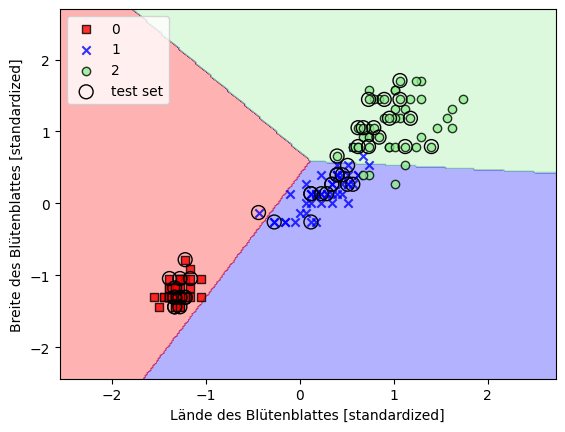

In [25]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))  

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Lände des Blütenblattes [standardized]')
plt.ylabel('Breite des Blütenblattes [standardized]')
plt.legend(loc='upper left')
plt.show()


In Kapitel 2 hatten wir festgestellt, dass der Perzeptron-Algorithmus nicht konvergiert,
wenn sich die Datenmengen nicht vollkommen linear trennen lassen, daher
ist von der Verwendung des Perzeptron-Algorithmus in der Praxis üblicherweise
abzuraten. In den nächsten Abschnitten sehen wir uns leistungsfähigere lineare
Klassifikatoren an, die auch dann gegen ein Minimum der Straffunktion konvergieren,
wenn sich die Klassen nicht vollständig linear voneinander trennen lassen.